<a href="https://colab.research.google.com/github/AnchitSharma/tensorflow-for-deep-learning-with-python/blob/master/tensorflow_basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.randn(len(x_data))

In [5]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
y_true

array([ 5.75101913,  6.67083376,  4.36166463, ...,  8.46353512,
       10.49986278, 12.05819941])

In [8]:
x_df = pd.DataFrame(data=x_data, columns=["X Data"])

In [9]:
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [14]:
my_data = pd.concat([x_df, y_df], axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,5.751019
1,0.00001,6.670834
2,0.00002,4.361665
3,0.00003,6.117671
4,0.00004,5.250137


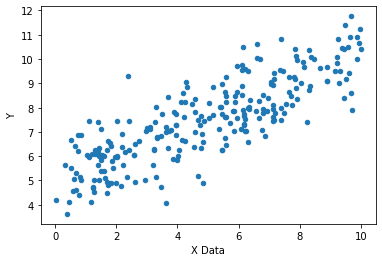

In [16]:
my_data.sample(250).plot(kind="scatter", x= "X Data", y="Y")

In [17]:
batch_size = 8

In [18]:
np.random.randn(2)

array([ 1.59653008, -0.13910723])

In [19]:
m = tf.Variable(1.59)
b = tf.Variable(0.13)

In [20]:
xph = tf.placeholder(tf.float32, shape=[batch_size])

In [21]:
yph = tf.placeholder(tf.float32, [batch_size])

In [22]:
y_model = xph* m + b

In [23]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
  sess.run(init)
  batches =10000
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data), size=batch_size)

    feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}

    sess.run(train, feed_dict= feed)


  model_m , model_b = sess.run([m, b])




In [44]:
model_m

0.49645048

In [45]:
model_b

4.9290457

In [46]:
y_hat = model_m*x_data + model_b

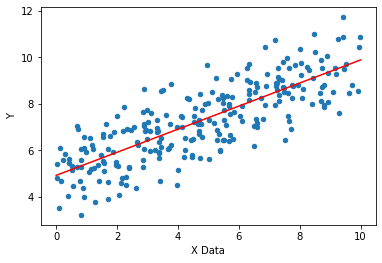

In [47]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(x_data, y_hat, 'r')